In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly


In [31]:
data = pd.read_csv(r'/Users/anu/Downloads/Bitcoin/bitcoin_price_Training - Training.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [32]:
data.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [35]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [40]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Weekday']=data['Date'].dt.day_name()

data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day,Month,Weekday
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",31,7,Monday
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",30,7,Sunday
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",29,7,Saturday
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",28,7,Friday
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",27,7,Thursday


In [59]:
data = data.sort_index(ascending=False).reset_index()


In [60]:
data.drop('index' , axis=1 , inplace=True)


In [61]:
data

,level_0,Date,Open,High,Low,Close,Volume,Market Cap,Day,Month,Weekday
0,1555,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",31,7,Monday
1,1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",30,7,Sunday
2,1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",29,7,Saturday
3,1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",28,7,Friday
4,1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",27,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
1551,4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",2,5,Thursday
1552,3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",1,5,Wednesday
1553,2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",30,4,Tuesday
1554,1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",29,4,Monday


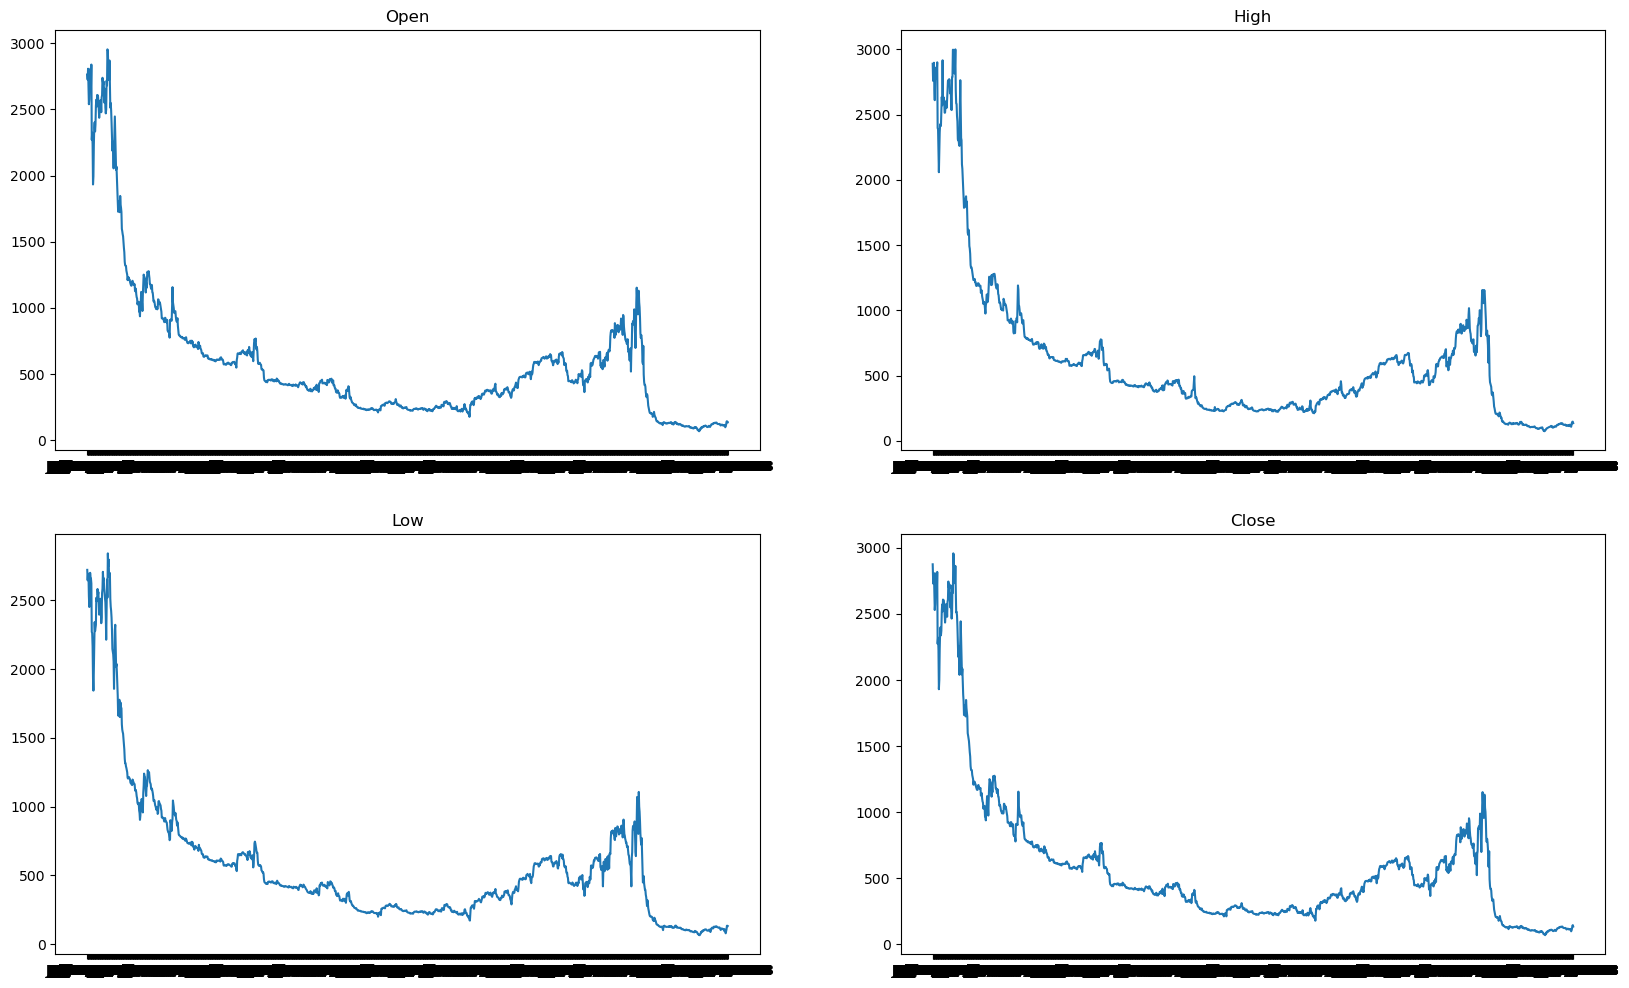

In [64]:
plt.figure(figsize=(20,12))

for level_0 , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,level_0)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

In [68]:
bitcoin_sample = data[0:50]


In [70]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [72]:
init_notebook_mode(connected=True)

In [73]:
trace = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

In [74]:
candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

In [75]:
fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

<Axes: >

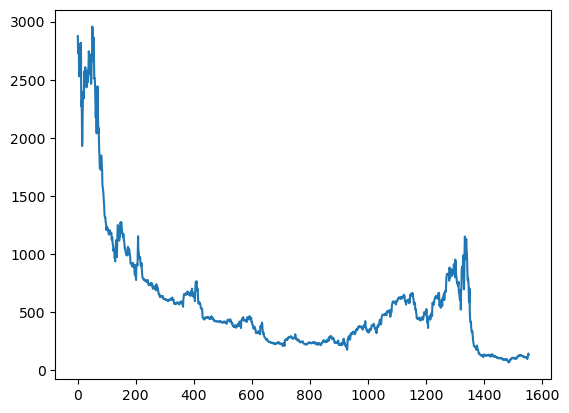

In [76]:
data['Close'].plot()

In [77]:
data.set_index('Date' , inplace=True)

<Axes: xlabel='Date'>

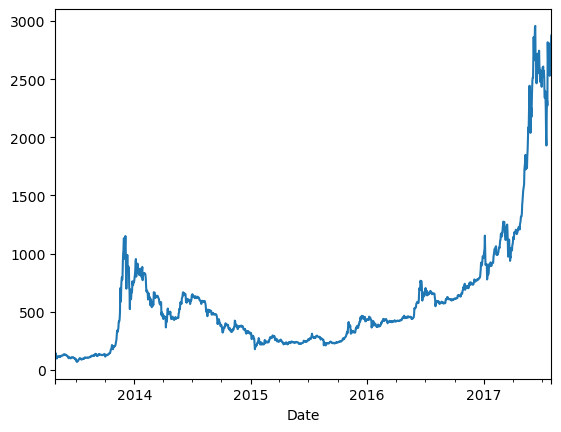

In [78]:
data['Close'].plot()

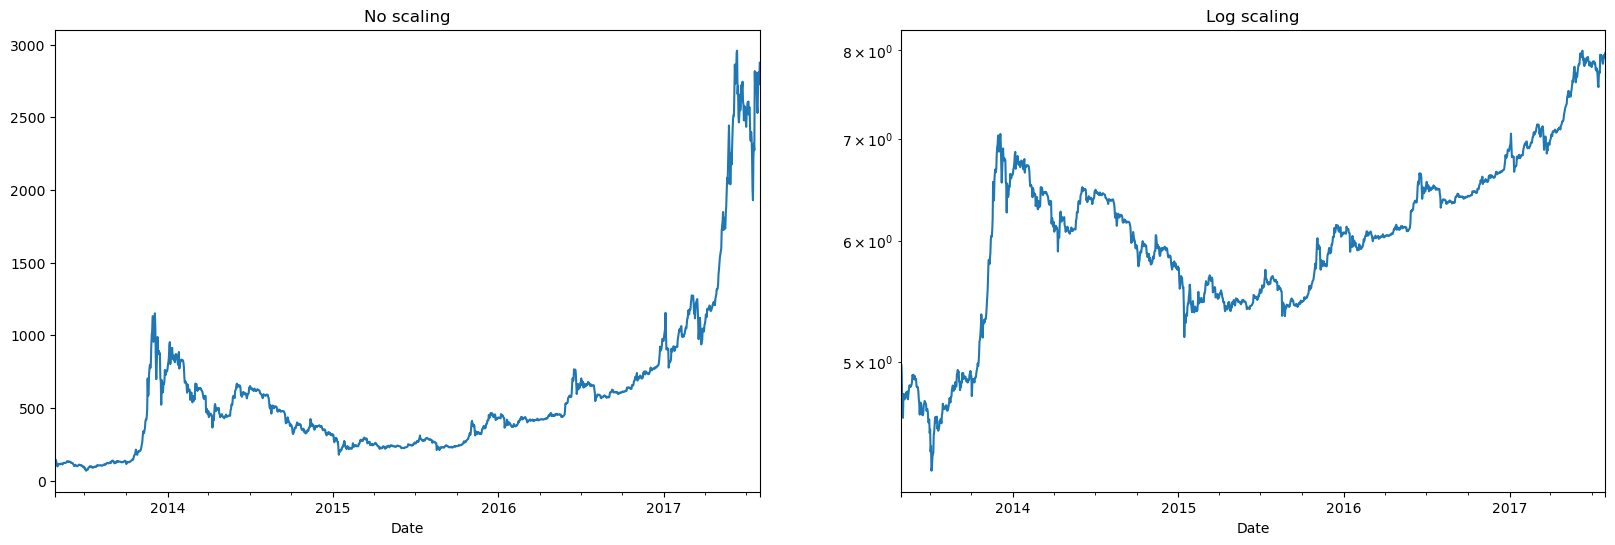

In [79]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

<Axes: xlabel='Date'>

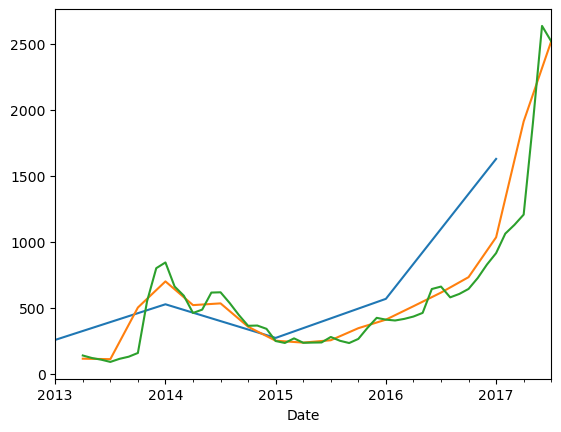

In [81]:
data['Close'].resample('Y').mean().plot()
data['Close'].resample('Q').mean().plot()
data['Close'].resample('M').mean().plot()

In [83]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

<Axes: xlabel='Date'>

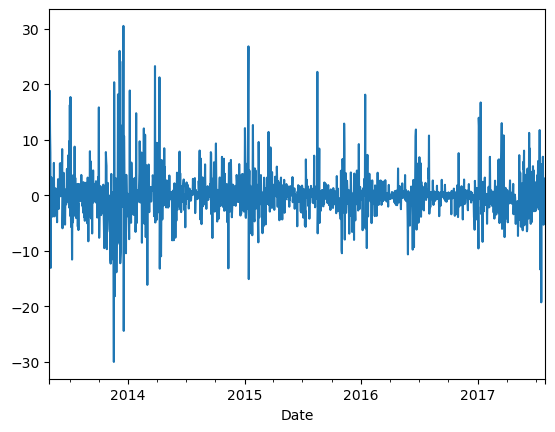

In [85]:
data['Close_price_pct_change'].plot()

In [87]:
import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot() when working in a Jupyter Notebook to display the plot in the notebook.
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.

In [92]:
import cufflinks as cf
cf.go_offline()

In [93]:
data['Close_price_pct_change'].iplot()

In [91]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67902 sha256=1a82873dfe1c91f8997a4201a830d076e8bf8d7a6b50e43f2bd8052602ea99ad
  Stored in directory: /Users/anu/Library/Caches/pip/wheels/c3/bf/8f/afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks
